# Notebook con Masa puntual absoluta y perfil de densidad

## Cargamos los paquetes

In [ ]:
#Cargamos los paquetes que nos ayudarán a calcular la masa
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import quad, dblquad
import sympy as sp
import pandas as pd
from scipy.stats import norm
import seaborn as sns

## Definimos constantes

In [ ]:
#Definimos las constantes
kpc_to_km = 3.0857e16 #km
M_sun = 1.9885e30 #1.9891e30 #kg
km_to_m = 1e3 #m
yr_to_s = 3.1536e7 #s
Gyr_s = yr_to_s*1e9 #s

# Unidades canónicas
ul= 1.0 #kpc
um= (1.0e0) # M_Sun
uv = 1 #km/s
ut = ul*kpc_to_km/(uv*Gyr_s)
ut_y1 = (ut/yr_to_s) #Myr
ut_y = (ut/yr_to_s)/1e6

#Deduccion unidades G
G_ini = 6.674e-11 #m^3/(kg.s^2)

Gkm = G_ini / (km_to_m)**3  #km³ / (kg * s²)
G1 = (Gkm /kpc_to_km) * M_sun    # (kpc/M_sun) (km/s)²

G2 = (G1/ul*uv)*um #Este es el valor de G que usamos en el script

G2 = (G1/ul*uv)*um #Este es el valor de G que usamos en el script

M_b= 5.00e9/um #Masas solares (BULBO)
r_b = 1.00/ul #kpc (BULBO)
M_n= 1.71e9/um #unidades de masa (NUCLEO)
r_n = 0.07/ul #unidades longitud (NUCLEO)
M_d = 6.80e10/um #Masas solares (DISCO)
a_d = 3.00/ul #kpc (DISCO)
b_d = 0.28/ul #kpc (DISCO)
M_h = 5.40e11/um # Masas solares (HALO)
r_s = 15.62/ul #kpc (HALO)
M = M_b + M_n + M_d + M_h

## Funciones de acumulación de masa ingresando radio

In [ ]:
#Masas
#dM del nucleo
def mas_nucleo(r_GC):
  a_esf = 0.0
  b_esf = r_GC
  Mn, err = quad(lambda r_GC:2*M_n*r_n*r_GC/(r_GC + r_n)**3,a_esf,b_esf)
  return Mn

#print('núcleo', mas_nucleo(r_GC))
  
#dM del bulbo
def mas_bulbo(r_GC):
  a_esf = 0.0
  b_esf = r_GC
  Mb, err = quad(lambda r_GC:2*M_b*r_b*r_GC/(r_GC + r_b)**3,a_esf,b_esf) 
  return Mb
#print('bulbo', mas_bulbo(r_GC))

#d/dz(dM/dR)=d/dR(dM/z) del disco. La igualdad es cierta gracias al teorema de Clairaut
def mas_disk(R_GC,z_GC):
  Md, err = dblquad(lambda z_GC, R_GC:(2*M_d*R_GC*b_d**2/2)*(a_d*R_GC**2 + (a_d + 3*np.sqrt(z_GC**2 + b_d**2))*(a_d + np.sqrt(z_GC**2 + b_d**2))**2)/((R_GC**2 + (a_d + np.sqrt(z_GC**2 + b_d**2))**2)**(5/2)*(z_GC**2 + b_d**2)**(3/2)),0,R_GC, lambda R_GC: 0, lambda R_GC: z_GC)
  return Md
#print('disco', mas_disk(R_GC,z_GC))

#dM del halo
def mas_halo(r_GC):
  a_esf = 0.0
  b_esf = r_GC
  Mh, err = quad(lambda r_GC:M_h*r_s/(r_GC + r_s)**2,a_esf,b_esf)
  return Mh

## Errores asociados a la estimación de las integrales numéricas

In [ ]:
#Masas
#dM del nucleo
def E_nucleo(r_GC):
  a_esf = 0.0
  b_esf = r_GC
  Mn, err = quad(lambda r_GC:2*M_n*r_n*r_GC/(r_GC + r_n)**3,a_esf,b_esf)
  return err

#print('núcleo', mas_nucleo(r_GC))
  
#dM del bulbo
def E_bulbo(r_GC):
  a_esf = 0.0
  b_esf = r_GC
  Mb, err = quad(lambda r_GC:2*M_b*r_b*r_GC/(r_GC + r_b)**3,a_esf,b_esf) 
  return err
#print('bulbo', mas_bulbo(r_GC))

#d/dz(dM/dR)=d/dR(dM/z) del disco. La igualdad es cierta gracias al teorema de Clairaut
def E_disk(R_GC,z_GC):
  Md, err = dblquad(lambda z_GC, R_GC:(2*M_d*R_GC*b_d**2/2)*(a_d*R_GC**2 + (a_d + 3*np.sqrt(z_GC**2 + b_d**2))*(a_d + np.sqrt(z_GC**2 + b_d**2))**2)/((R_GC**2 + (a_d + np.sqrt(z_GC**2 + b_d**2))**2)**(5/2)*(z_GC**2 + b_d**2)**(3/2)),0,R_GC, lambda R_GC: 0, lambda R_GC: z_GC)
  return err
#print('disco', mas_disk(R_GC,z_GC))

#dM del halo
def E_halo(r_GC):
  a_esf = 0.0
  b_esf = r_GC
  Mh, err = quad(lambda r_GC:M_h*r_s/(r_GC + r_s)**2,a_esf,b_esf)
  return err

## Usamos las funciones de masa

In [ ]:
#Guardamos los datos en listas vacías
Nu = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el núcleo
Bu = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el bulbo
Ha = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el halo
Di = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el disco
Radio_contador = [] #vamos mirando para ese radio la masa porcentual acumulada de cada uno de estos 4 componentes

dist = np.linspace(0,200,2000)
z=0.9 #se puso un valor pequeño de z por conveniencia para el disco.
for i in dist:
  if i==0.0:
    Rn = mas_nucleo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc 
    Rb = mas_bulbo(i)  #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rh = mas_halo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rd = 0.0 #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Nu.append(Rn)
    Bu.append(Rb)
    Ha.append(Rh)
    Di.append(Rd)
    Radio_contador.append(i)
  else:
    Rn = mas_nucleo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc 
    Rb = mas_bulbo(i)  #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rh = mas_halo(i)   #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rd = mas_disk(np.sqrt(i**2-z**2),z) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Nu.append(Rn)
    Bu.append(Rb)
    Ha.append(Rh)
    Di.append(Rd)
    Radio_contador.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


## Generamos el for sólo para el disco

In [ ]:
#Guardamos los datos en listas vacías
Dis = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el disco
E_Dis = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el disco
Rad_contador = [] #vamos mirando para ese radio la masa porcentual acumulada de cada uno de estos 4 componentes

dist = np.linspace(0,200,2000)
z=0.9 #se puso un valor pequeño de z por conveniencia para el disco.
for i in dist:
  Rd = mas_disk(i,z) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
  E_Rd = E_disk(i,z)
  Dis.append(Rd)
  E_Dis.append(E_Rd)
  Rad_contador.append(i)

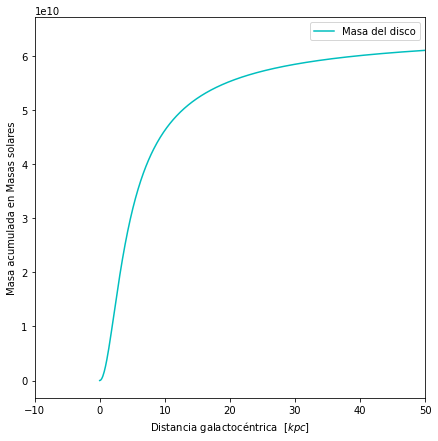

In [ ]:
#Ahora tenemos todo para hacer las gráficas, todas juntas
#Ahora veamos el núcleo, el bulbo, el disco, el halo y todos los componentes  juntos
#Hacemos un gráfico con los valores obtenidos
plt.figure(figsize=(7,7))
plt.plot(Rad_contador,Dis,color='c',label='Masa del disco')
plt.ylabel("Masa acumulada en Masas solares")
plt.xlabel("Distancia galactocéntrica  $[kpc]$")
plt.xlim(-10,50)
plt.legend()
#plt.savefig('Masa_absoluta_all.png')
plt.show()

 ## Ahora las del Error

In [ ]:
#Guardamos los datos en listas vacías
E_Nu = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el núcleo
E_Bu = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el bulbo
E_Ha = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el halo
E_Di = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el disco
E_Radio_contador = [] #vamos mirando para ese radio la masa porcentual acumulada de cada uno de estos 4 componentes

dist = np.linspace(0,200,2000)
z=0.9 #se puso un valor pequeño de z por conveniencia para el disco.
for i in dist:
  if i==0.0:
    Rn = E_nucleo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc 
    Rb = E_bulbo(i)  #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rh = E_halo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rd = 0.0 #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    E_Nu.append(Rn)
    E_Bu.append(Rb)
    E_Ha.append(Rh)
    E_Di.append(Rd)
    E_Radio_contador.append(i)
  else:
    Rn = E_nucleo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc 
    Rb = E_bulbo(i)  #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rh = E_halo(i)   #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rd = E_disk(np.sqrt(i**2-z**2),z) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    E_Nu.append(Rn)
    E_Bu.append(Rb)
    E_Ha.append(Rh)
    E_Di.append(Rd)
    E_Radio_contador.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


## Guardamos las funciones en un dataframe y exportamos

In [ ]:
#Ahora creamos un dataframe para tenr los datos por este otro lado
Masa_for_radio = pd.DataFrame({'Radio(kpc)':Radio_contador,'Masa_nucleo':Nu,'Masa_bulbo':Bu,'Masa_halo':Ha,'Masa_disco':Dis, 'E_nucleo':E_Nu, 'E_bulbo':E_Bu, 'E_halo':E_Ha, 'E_disco':E_Dis})

In [ ]:
#Miramos la tabla
Masa_for_radio.head(7)

,Radio(kpc),Masa_nucleo,Masa_bulbo,Masa_halo,Masa_disco,E_nucleo,E_bulbo,E_halo,E_disco
0,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
1,0.10005,5.919392e+08,4.135991e+07,3.436822e+09,3.480524e+07,0.000975,4.591872e-07,0.000038,0.013759
2,0.20010,9.385149e+08,1.390047e+08,6.830173e+09,1.388966e+08,0.000979,1.543262e-06,0.000076,0.027381
3,0.30015,1.124391e+09,2.664771e+08,1.018087e+10,3.113094e+08,1.038854,2.958490e-06,0.000113,0.040731
4,0.40020,1.238754e+09,4.084550e+08,1.348972e+10,5.504624e+08,0.000982,4.534761e-06,0.000150,0.053684
5,0.50025,1.315951e+09,5.559261e+08,1.675750e+10,8.541972e+08,0.052295,6.172020e-06,0.000186,0.066123
6,0.60030,1.371495e+09,7.035647e+08,1.998496e+10,1.219830e+09,1.038856,7.811137e-06,0.000222,0.077945


In [ ]:
Masa_for_radio['E_nucleo'].max(), Masa_for_radio['E_bulbo'].max(),Masa_for_radio['E_disco'].max(),Masa_for_radio['E_halo'].max()

(25.40402291942155, 73.10784558014711, 938.920129455626, 6932.138906594366)

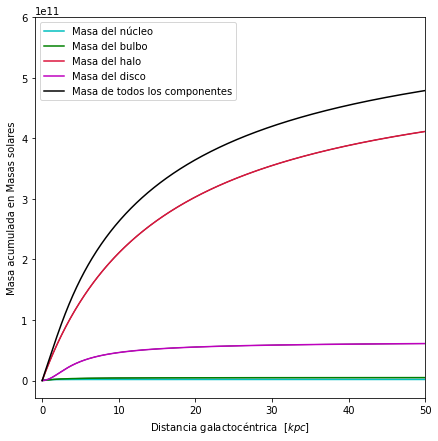

In [ ]:
#Ahora tenemos todo para hacer las gráficas, todas juntas
#Ahora veamos el núcleo, el bulbo, el disco, el halo y todos los componentes  juntos
#Hacemos un gráfico con los valores obtenidos
plt.figure(figsize=(7,7))
plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_nucleo'],color='c',label='Masa del núcleo')
plt.fill_between(Masa_for_radio['Radio(kpc)'], Masa_for_radio['Masa_nucleo'] - Masa_for_radio['E_nucleo'], Masa_for_radio['Masa_nucleo'] + Masa_for_radio['E_nucleo'], color='gray', alpha=0.9)

plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_bulbo'],color='g',label='Masa del bulbo')
plt.fill_between(Masa_for_radio['Radio(kpc)'], Masa_for_radio['Masa_bulbo'] - Masa_for_radio['E_bulbo'], Masa_for_radio['Masa_bulbo'] + Masa_for_radio['E_bulbo'], color='gray', alpha=0.9)

plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_halo'],color='crimson',label='Masa del halo')
plt.fill_between(Masa_for_radio['Radio(kpc)'], Masa_for_radio['Masa_halo'] - Masa_for_radio['E_halo'], Masa_for_radio['Masa_halo'] + Masa_for_radio['E_halo'], color='gray', alpha=0.9)

plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_disco'],color='m',label='Masa del disco')
plt.fill_between(Masa_for_radio['Radio(kpc)'], Masa_for_radio['Masa_disco'] - Masa_for_radio['E_disco'], Masa_for_radio['Masa_disco'] + Masa_for_radio['E_disco'], color='gray', alpha=0.9)
#plt.plot(Rad_contador,Dis,color='orange',label='Masa del disco II')
plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_nucleo']+Masa_for_radio['Masa_bulbo']+Masa_for_radio['Masa_halo']+Masa_for_radio['Masa_disco'],color='k',label='Masa de todos los componentes')
plt.ylabel("Masa acumulada en Masas solares")
plt.xlabel("Distancia galactocéntrica  $[kpc]$")
plt.xlim(-1,50)
plt.legend()
#plt.savefig('Masa_absoluta_all.png')
plt.show()

## Incluimos la masa puntual (Método II)

### Creamos un nuevo dataframe

In [ ]:
df_puntual = pd.DataFrame({'Radius_kpc':Masa_for_radio['Radio(kpc)'][1:],'M_puntual_nucleo':np.diff(Masa_for_radio['Masa_nucleo']),'M_puntual_bulbo':np.diff(Masa_for_radio['Masa_bulbo']),'M_puntual_disco':np.diff(Dis),'M_puntual_halo':np.diff(Masa_for_radio['Masa_halo']),'E_p_nucleo':np.diff(Masa_for_radio['E_nucleo']),'E_p_bulbo':np.diff(Masa_for_radio['E_bulbo']),'E_p_halo':np.diff(Masa_for_radio['E_halo']),'E_p_disco':np.diff(E_Dis)})

In [ ]:
df_puntual.head(5)

,Radius_kpc,M_puntual_nucleo,M_puntual_bulbo,M_puntual_disco,M_puntual_halo,E_p_nucleo,E_p_bulbo,E_p_halo,E_p_disco
1,0.10005,5.919392e+08,4.135991e+07,3.480524e+07,3.436822e+09,0.000975,4.591872e-07,0.000038,0.013759
2,0.20010,3.465757e+08,9.764480e+07,1.040914e+08,3.393351e+09,0.000004,1.084075e-06,0.000038,0.013622
3,0.30015,1.858760e+08,1.274724e+08,1.724127e+08,3.350700e+09,1.037875,1.415228e-06,0.000037,0.013350
4,0.40020,1.143630e+08,1.419778e+08,2.391530e+08,3.308849e+09,-1.037871,1.576271e-06,0.000037,0.012952
5,0.50025,7.719710e+07,1.474711e+08,3.037348e+08,3.267776e+09,0.051313,1.637259e-06,0.000036,0.012439


## Agregamos una nueva columna que sería la pendiente local en cada punto

In [ ]:
df_puntual_2 = pd.DataFrame({'Radio_kpc':df_puntual['Radius_kpc'][1:],'derivada_nucleo':np.diff(df_puntual['M_puntual_nucleo'])/np.diff(df_puntual['Radius_kpc']),'derivada_bulbo':np.diff(df_puntual['M_puntual_bulbo'])/np.diff(df_puntual['Radius_kpc']),'derivada_halo':np.diff(df_puntual['M_puntual_halo'])/np.diff(df_puntual['Radius_kpc']),'derivada_disco':np.diff(df_puntual['M_puntual_disco'])/np.diff(df_puntual['Radius_kpc'])})

In [ ]:
"""
df_puntual['derivada_nucleo'] = np.diff(df_puntual['M_puntual_nucleo'])/np.diff(df_puntual['Radius_kpc'])
df_puntual['derivada_bulbo'] = np.diff(df_puntual['M_puntual_bulbo'])/np.diff(df_puntual['Radius_kpc'])
df_puntual['derivada_halo'] = np.diff(df_puntual['M_puntual_halo'])/np.diff(df_puntual['Radius_kpc'])
df_puntual['derivada_disco'] = np.diff(df_puntual['M_puntual_disco'])/np.diff(df_puntual['Radius_kpc'])
"""

"\ndf_puntual['derivada_nucleo'] = np.diff(df_puntual['M_puntual_nucleo'])/np.diff(df_puntual['Radius_kpc'])\ndf_puntual['derivada_bulbo'] = np.diff(df_puntual['M_puntual_bulbo'])/np.diff(df_puntual['Radius_kpc'])\ndf_puntual['derivada_halo'] = np.diff(df_puntual['M_puntual_halo'])/np.diff(df_puntual['Radius_kpc'])\ndf_puntual['derivada_disco'] = np.diff(df_puntual['M_puntual_disco'])/np.diff(df_puntual['Radius_kpc'])\n"

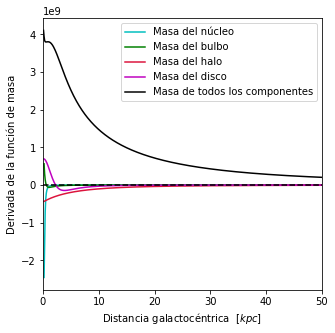

In [ ]:
#Ahora tenemos todo para hacer las gráficas, todas juntas
#Ahora veamos el núcleo, el bulbo, el disco, el halo y todos los componentes  juntos
#Hacemos un gráfico con los valores obtenidos
plt.figure(figsize=(5,5))
plt.plot(df_puntual_2['Radio_kpc'],df_puntual_2['derivada_nucleo'] ,color='c',label='Masa del núcleo')
plt.plot(df_puntual_2['Radio_kpc'],df_puntual_2['derivada_bulbo'],color='g',label='Masa del bulbo')
plt.plot(df_puntual_2['Radio_kpc'],df_puntual_2['derivada_halo'],color='crimson',label='Masa del halo')
plt.plot(df_puntual_2['Radio_kpc'],df_puntual_2['derivada_disco'],color='m',label='Masa del disco')
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_nucleo']+df_puntual['M_puntual_bulbo']+df_puntual['M_puntual_halo']+df_puntual['M_puntual_disco'],color='k',label='Masa de todos los componentes')
plt.axhline(y=0, color ='k', linestyle = "--")
plt.ylabel("Derivada de la función de masa")
plt.xlabel("Distancia galactocéntrica  $[kpc]$")
plt.xlim(0,50)
plt.legend()
#plt.savefig('Masa_all.png')
plt.show()

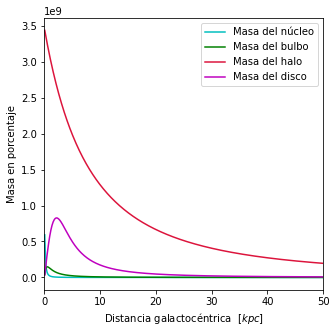

In [ ]:
#Ahora tenemos todo para hacer las gráficas, todas juntas
#Ahora veamos el núcleo, el bulbo, el disco, el halo y todos los componentes  juntos
#Hacemos un gráfico con los valores obtenidos
plt.figure(figsize=(5,5))
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_nucleo'],color='c',label='Masa del núcleo')
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_bulbo'],color='g',label='Masa del bulbo')
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_halo'],color='crimson',label='Masa del halo')
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_disco'],color='m',label='Masa del disco')
#plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_nucleo']+df_puntual['M_puntual_bulbo']+df_puntual['M_puntual_halo']+df_puntual['M_puntual_disco'],color='k',label='Masa de todos los componentes')
plt.ylabel("Masa en porcentaje")
plt.xlabel("Distancia galactocéntrica  $[kpc]$")
plt.xlim(0,50)
#plt.ylim(0,2)
plt.legend()
#plt.savefig('Masa_all.png')
plt.show()

## Funciones de densidad

In [ ]:
#Masas
#dM del nucleo
def dens_nucleo(r_GC):
  Mn = (M_n/(2*np.pi))*r_n/(r_GC*(r_GC + r_n)**3)
  return Mn

#print('núcleo', mas_nucleo(r_GC))
  
#dM del bulbo
def dens_bulbo(r_GC):
  Mb = (M_b/(2*np.pi))*r_b/(r_GC*(r_GC + r_b)**3) 
  return Mb
#print('bulbo', mas_bulbo(r_GC))

#d/dz(dM/dR)=d/dR(dM/z) del disco.
def dens_disk(R_GC,z_GC):
  Md = (M_d*b_d**2/(4*np.pi))*(a_d*R_GC**2 + (a_d + 3*np.sqrt(z_GC**2 + b_d**2))*(a_d + np.sqrt(z_GC**2 + b_d**2))**2)/((R_GC**2 + (a_d + np.sqrt(z_GC**2 + b_d**2))**2)**(5/2)*(z_GC**2 + b_d**2)**(3/2))
  return Md
#print('disco', mas_disk(R_GC,z_GC))

#dM del halo
def dens_halo(r_GC):
  Mh =(M_h/(4*np.pi))*r_s/(r_GC*(r_GC + r_s))**2
  return Mh

## Uso de las funciones de densidad

In [ ]:
#Guardamos los datos en listas vacías
Dens_Nu = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el núcleo
Dens_Bu = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el bulbo
Dens_Ha = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el halo
Dens_Di = [] #Lista de Acumulación del Radio para una masa porcentual acumulada dada en el disco
Dens_distancia = [] #vamos mirando para ese radio la masa porcentual acumulada de cada uno de estos 4 componentes

distan = np.linspace(0,200,2000)
z=0.001 #se puso un valor pequeño de z por conveniencia para el disco.
for i in distan:
    Rn = dens_nucleo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc 
    Rb = dens_bulbo(i)  #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rh = dens_halo(i) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Rd = dens_disk(i,z) #Entrega la masa porcentual acumulada para un radio entre 0 y 500 kpc
    Dens_Nu.append(Rn)
    Dens_Bu.append(Rb)
    Dens_Ha.append(Rh)
    Dens_Di.append(Rd)
    Dens_distancia.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
#Hacemos el dataframe
perfil_den =pd.DataFrame({'Distancia_kpc':Dens_distancia,'Den_nucleo':Dens_Nu,'Den_bulbo':Dens_Bu,'Den_disco':Dens_Di,'Den_halo':Dens_Ha})

In [ ]:
perfil_den.describe()

,Distancia_kpc,Den_nucleo,Den_bulbo,Den_disco,Den_halo
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,100.000000,inf,inf,3.248074e+07,inf
std,57.778348,NaN,NaN,1.994690e+08,NaN
min,0.000000,0.011894,0.489973,7.244718e+03,3.609332e+02
25%,50.000000,0.037579,1.540878,1.716829e+04,1.087570e+03
50%,100.000000,0.190109,7.723730,5.790083e+04,5.021112e+03
75%,150.000000,3.035392,119.981082,4.613912e+05,6.235266e+04
max,200.000000,inf,inf,2.103015e+09,inf


##Masa y Densidad núcleo

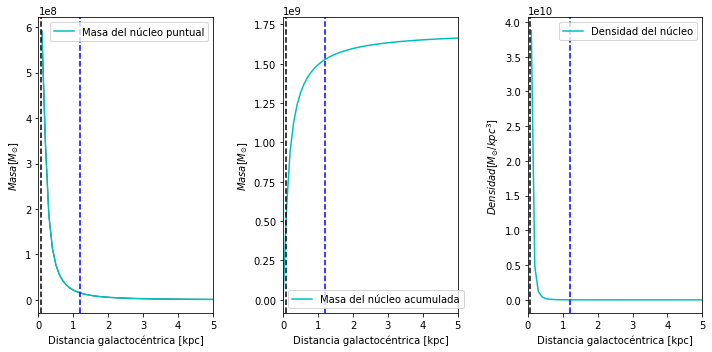

In [ ]:
#Masa para el núcleo
#Mnucleo = [r_n]*1999
#Pro = [1.2]*1999
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_nucleo'],color='c', label='Masa del núcleo puntual')
plt.fill_between(df_puntual['Radius_kpc'], df_puntual['M_puntual_nucleo'] - Masa_for_radio['E_nucleo'][1:], df_puntual['M_puntual_nucleo'] + Masa_for_radio['E_nucleo'][1:], color='gray', alpha=0.9)
#plt.plot(Mnucleo,df_puntual['M_puntual_nucleo'],color = 'k')
#plt.plot(Pro,df_puntual['M_puntual_nucleo'],color = 'b')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(1.2,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.legend()
plt.xlim(0,5)


plt.subplot(132)
plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_nucleo'],color='c',label='Masa del núcleo acumulada')
#plt.plot(Mnucleo,df_puntual['M_puntual_nucleo'],color = 'k')
#plt.plot(Pro,df_puntual['M_puntual_nucleo'],color = 'b')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(1.2,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.legend()
plt.xlim(0,5)

#Densidad para el núcleo
plt.subplot(133)
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_nucleo'],color='c',label='Densidad del núcleo')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(1.2,color='b',linestyle="--")
#plt.plot(Mnucleo,perfil_den['Den_nucleo'][:-1],color = 'k')
#plt.plot(Pro,perfil_den['Den_nucleo'][:-1],color = 'b')

plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Densidad [M_{\odot}/kpc^3]$')
plt.legend()
plt.xlim(0,5)
plt.tight_layout() # para que no se superpongan las graficas
plt.show()

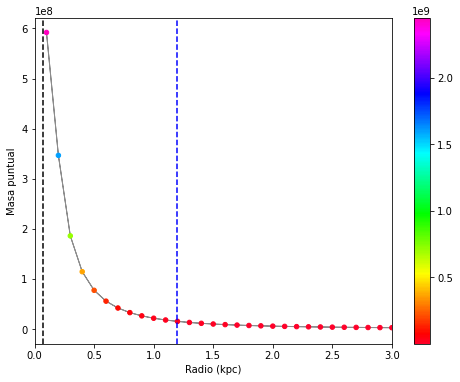

In [ ]:
#Ahora graficamos MAsa puntual vs radio con la barra de derivada.
x= df_puntual['Radius_kpc'][:-1] #Radio
y= df_puntual['M_puntual_nucleo'][:-1] #Masa puntual
barra1= df_puntual_2['derivada_nucleo'].abs() #velocidad calculada

fig, ax = plt.subplots(figsize=(8, 6))

#ax.set(title='Masa puntual y barra de derivada de masa')
plt.xlabel('Radio (kpc)')
plt.ylabel('Masa puntual')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(1.2,color='b',linestyle="--")
plt.fill_between(df_puntual['Radius_kpc'], df_puntual['M_puntual_nucleo'] - Masa_for_radio['E_nucleo'][1:], df_puntual['M_puntual_nucleo'] + Masa_for_radio['E_nucleo'][1:], color='gray', alpha=0.9)
plt.xlim(0,3)
dispersion =ax.scatter(x, y,s = 20, c=barra1, cmap='gist_rainbow')


fig.colorbar(dispersion)

## Masa y Densidad Bulbo

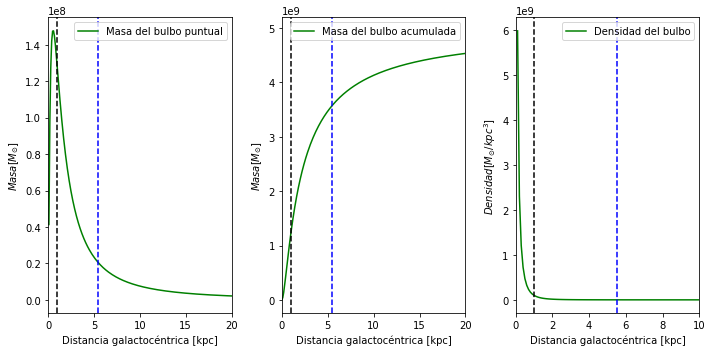

In [ ]:
#Masa para el bulbo
Mbulbo = [r_b]*1999
Prob = [9.0]*1999
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_bulbo'],color='g',label='Masa del bulbo puntual')
#plt.plot(Mbulbo,df_puntual['M_puntual_bulbo'],color = 'k')
#plt.plot(Prob,df_puntual['M_puntual_bulbo'],color = 'b')
plt.axvline(r_b,color='k',linestyle="--")
plt.axvline(5.5,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.xlim(0,20)
plt.legend()

plt.subplot(132)
plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_bulbo'],color='g',label='Masa del bulbo acumulada')
#plt.plot(Mbulbo,df_puntual['M_puntual_bulbo'],color = 'k')
#plt.plot(Prob,df_puntual['M_puntual_bulbo'],color = 'b')
plt.axvline(r_b,color='k',linestyle="--")
plt.axvline(5.5,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.xlim(0,20)
plt.legend()


#Densidad para el bulbo
plt.subplot(133)
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_bulbo'],color='g',label='Densidad del bulbo')
plt.axvline(r_b,color='k',linestyle="--")
plt.axvline(5.5,color='b',linestyle="--")
#plt.plot(Mbulbo,perfil_den['Den_bulbo'][:-1],color = 'k')
#plt.plot(Prob,perfil_den['Den_bulbo'][:-1],color = 'b')

plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Densidad [M_{\odot}/kpc^3]$')

plt.xlim(0,10)
plt.tight_layout() # para que no se superpongan las graficas
plt.legend()
plt.show()

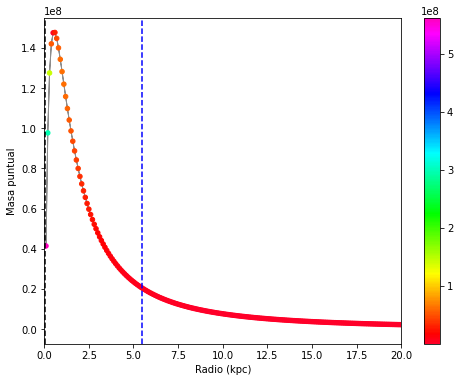

In [ ]:
#Ahora graficamos Masa puntual vs radio con la barra de derivada.
x= df_puntual['Radius_kpc'][:-1] #Radio
y= df_puntual['M_puntual_bulbo'][:-1] #Masa puntual
barra1= df_puntual_2['derivada_bulbo'].abs() #velocidad calculada

fig, ax = plt.subplots(figsize=(8, 6))

#ax.set(title='Masa puntual y barra de derivada de masa')
plt.xlabel('Radio (kpc)')
plt.ylabel('Masa puntual')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(5.5,color='b',linestyle="--")
plt.fill_between(df_puntual['Radius_kpc'], df_puntual['M_puntual_bulbo'] - Masa_for_radio['E_bulbo'][1:], df_puntual['M_puntual_bulbo'] + Masa_for_radio['E_bulbo'][1:], color='gray', alpha=0.9)
plt.xlim(0,20)
dispersion =ax.scatter(x, y,s = 20, c=barra1, cmap='gist_rainbow')


fig.colorbar(dispersion)

## Masa y Densidad disco

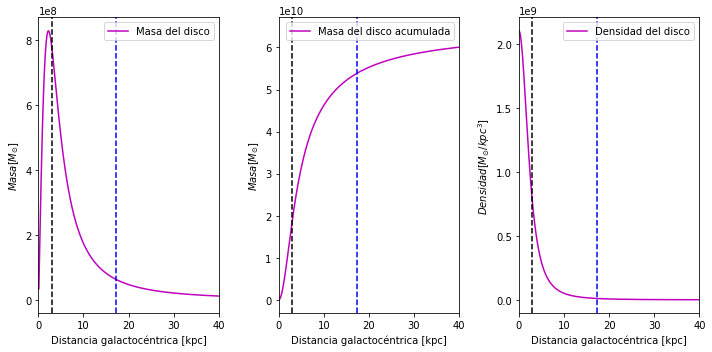

In [ ]:
#Masa para el disco
Mdisco = [a_d]*1999
Prod = [18.0]*1999
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_disco'],color='m',label='Masa del disco')
#plt.plot(Mdisco,df_puntual['M_puntual_disco'],color = 'k')
#plt.plot(Prod,df_puntual['M_puntual_disco'],color = 'b')
plt.axvline(a_d,color='k',linestyle="--")
plt.axvline(17.3,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.xlim(0,40)
plt.legend()


plt.subplot(132)
plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_disco'],color='m',label='Masa del disco acumulada')
#plt.plot(Mdisco,df_puntual['M_puntual_disco'],color = 'k')
#plt.plot(Prod,df_puntual['M_puntual_disco'],color = 'b')
plt.axvline(a_d,color='k',linestyle="--")
plt.axvline(17.3,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.xlim(0,40)
plt.legend()


#Densidad para el disco
plt.subplot(133)
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_disco'],color='m',label='Densidad del disco')
plt.axvline(a_d,color='k',linestyle="--")
plt.axvline(17.3,color='b',linestyle="--")
#plt.plot(Mdisco,perfil_den['Den_disco'][:-1],color = 'k')
#plt.plot(Prod,perfil_den['Den_disco'][:-1],color = 'b')

plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Densidad [M_{\odot}/kpc^3]$')

plt.xlim(0,40)
#plt.ylim(0,0.2e8)
plt.tight_layout() # para que no se superpongan las graficas
plt.legend()
plt.show()

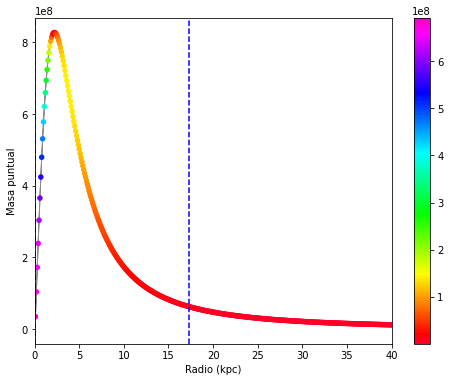

In [ ]:
#Ahora graficamos MAsa puntual vs radio con la barra de derivada.
x= df_puntual['Radius_kpc'][:-1] #Radio
y= df_puntual['M_puntual_disco'][:-1] #Masa puntual
barra1= df_puntual_2['derivada_disco'].abs() #velocidad calculada

fig, ax = plt.subplots(figsize=(8, 6))

#ax.set(title='Masa puntual y barra de derivada de masa')
plt.xlabel('Radio (kpc)')
plt.ylabel('Masa puntual')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(17.3,color='b',linestyle="--")
plt.fill_between(df_puntual['Radius_kpc'], df_puntual['M_puntual_disco'] - Masa_for_radio['E_disco'][1:], df_puntual['M_puntual_disco'] + Masa_for_radio['E_disco'][1:], color='gray', alpha=0.9)
plt.xlim(0,40)
dispersion =ax.scatter(x, y,s = 20, c=barra1, cmap='gist_rainbow')


fig.colorbar(dispersion)

## Masa y densidad halo

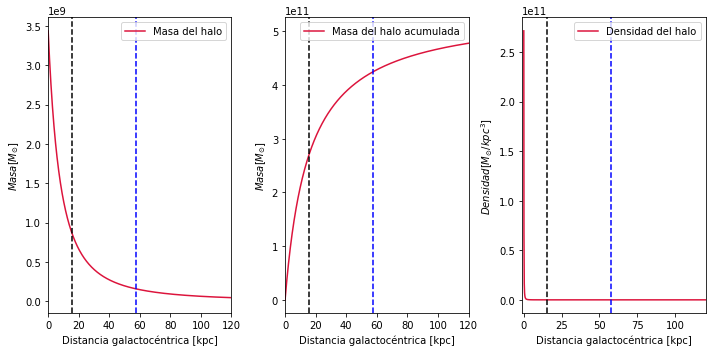

In [ ]:
#Masa para el halo
Mhalo = [r_s]*1999
Proh = [50.0]*1999
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_halo'],color='crimson',label='Masa del halo')
#plt.plot(Mhalo,df_puntual['M_puntual_halo'],color = 'k')
#plt.plot(Proh,df_puntual['M_puntual_halo'],color = 'b')
plt.axvline(r_s,color='k',linestyle="--")
plt.axvline(57.4,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.xlim(0,120)
plt.legend()


plt.subplot(132)
plt.plot(Masa_for_radio['Radio(kpc)'],Masa_for_radio['Masa_halo'],color='crimson',label='Masa del halo acumulada')
#plt.plot(Mhalo,df_puntual['M_puntual_halo'],color = 'k')
#plt.plot(Proh,df_puntual['M_puntual_halo'],color = 'b')
plt.axvline(r_s,color='k',linestyle="--")
plt.axvline(57.4,color='b',linestyle="--")
plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Masa [M_{\odot}]$')
plt.xlim(0,120)
plt.legend()

#Densidad para el halo
plt.subplot(133)
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_halo'],color='crimson',label='Densidad del halo')
plt.axvline(r_s,color='k',linestyle="--")
plt.axvline(57.4,color='b',linestyle="--")
#plt.plot(Mhalo,perfil_den['Den_halo'][:-1],color = 'k')
#plt.plot(Proh,perfil_den['Den_halo'][:-1],color = 'b')

plt.xlabel('Distancia galactocéntrica [kpc]')
plt.ylabel(r'$Densidad [M_{\odot}/kpc^3]$')

plt.xlim(-1,120)
plt.tight_layout() # para que no se superpongan las graficas
plt.legend()
plt.show()

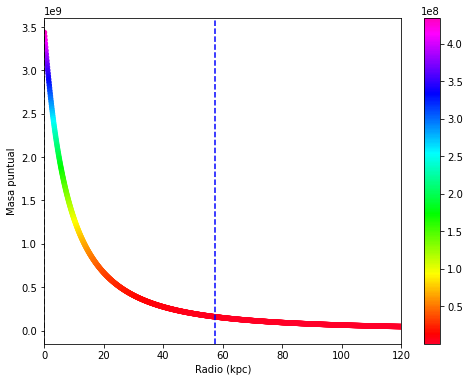

In [ ]:
#Ahora graficamos MAsa puntual vs radio con la barra de derivada.
x= df_puntual['Radius_kpc'][:-1] #Radio
y= df_puntual['M_puntual_halo'][:-1] #Masa puntual
barra1= df_puntual_2['derivada_halo'].abs() #velocidad calculada

fig, ax = plt.subplots(figsize=(8, 6))

#ax.set(title='Masa puntual y barra de derivada de masa')
plt.xlabel('Radio (kpc)')
plt.ylabel('Masa puntual')
plt.axvline(r_n,color='k',linestyle="--")
plt.axvline(57.4,color='b',linestyle="--")
plt.fill_between(df_puntual['Radius_kpc'], df_puntual['M_puntual_halo'] - Masa_for_radio['E_halo'][1:], df_puntual['M_puntual_halo'] + Masa_for_radio['E_halo'][1:], color='gray', alpha=0.9)
plt.xlim(0,120)
dispersion =ax.scatter(x, y,s = 20, c=barra1, cmap='gist_rainbow')


fig.colorbar(dispersion)

## Densidad todos

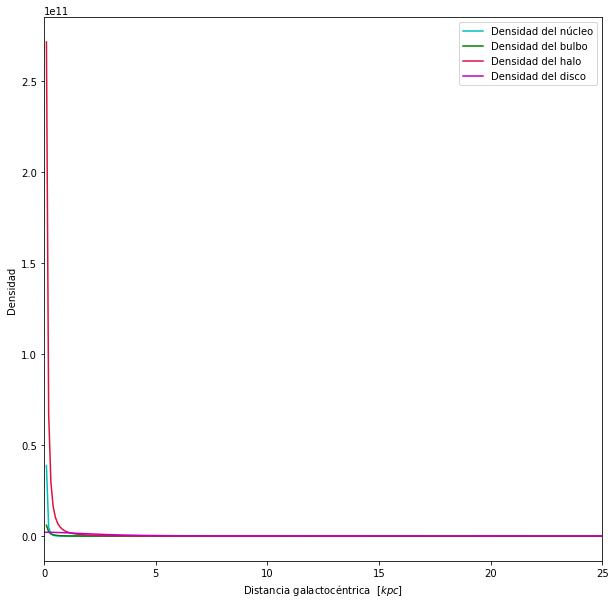

In [ ]:
#Ahora tenemos todo para hacer las gráficas, todas juntas
#Ahora veamos el núcleo, el bulbo, el disco, el halo y todos los componentes  juntos
#Hacemos un gráfico con los valores obtenidos
plt.figure(figsize=(10,10))
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_nucleo'],color='c',label='Densidad del núcleo')
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_bulbo'],color='g',label='Densidad del bulbo')
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_halo'],color='crimson',label='Densidad del halo')
plt.plot(perfil_den['Distancia_kpc'],perfil_den['Den_disco'],color='m',label='Densidad del disco')
#plt.plot(df_puntual['Radius_kpc'],df_puntual['M_puntual_nucleo']+df_puntual['M_puntual_bulbo']+df_puntual['M_puntual_halo']+df_puntual['M_puntual_disco'],color='k',label='Masa de todos los componentes')
plt.ylabel("Densidad")
plt.xlabel("Distancia galactocéntrica  $[kpc]$")
plt.xlim(0,25)
plt.legend()
#plt.savefig('Masa_all.png')
plt.show()

## Definición de los Umbrales

In [ ]:
(df_puntual_2['derivada_nucleo'].min())

-2452408430.2330127

In [ ]:
(df_puntual_2['derivada_nucleo'].abs()).max()

2452408430.2330127

### Umbral con la pendiente del núcleo

In [ ]:
#  Primer ensayo
df_puntual_2.loc[df_puntual_2['derivada_nucleo'].abs() >= 0.01*(df_puntual_2['derivada_nucleo'].abs()).max(),['Radio_kpc']]


,Radio_kpc
2,0.20010
3,0.30015
4,0.40020
5,0.50025
6,0.60030
7,0.70035
8,0.80040
9,0.90045
10,1.00050
11,1.10055


### Umbral con la pendiente del bulbo

In [ ]:
#  Primer ensayo
df_puntual_2.loc[df_puntual_2['derivada_bulbo'].abs() >= 0.01*(df_puntual_2['derivada_bulbo'].abs()).max(),['Radio_kpc']]

,Radio_kpc
2,0.200100
3,0.300150
4,0.400200
5,0.500250
7,0.700350
8,0.800400
9,0.900450
10,1.000500
11,1.100550
12,1.200600


### Umbral con la pendiente del halo

In [ ]:
df_puntual_2.loc[df_puntual_2['derivada_halo'].abs() >= 0.01*(df_puntual_2['derivada_halo'].abs()).max(),['Radio_kpc']]

,Radio_kpc
2,0.200100
3,0.300150
4,0.400200
5,0.500250
6,0.600300
...,...
570,57.028514
571,57.128564
572,57.228614
573,57.328664


### Umbral con la pendiente del disco

In [ ]:
df_puntual_2.loc[df_puntual_2['derivada_disco'].abs() >= 0.01*(df_puntual_2['derivada_disco'].abs()).max(),['Radio_kpc']]

,Radio_kpc
2,0.200100
3,0.300150
4,0.400200
5,0.500250
6,0.600300
...,...
169,16.908454
170,17.008504
171,17.108554
172,17.208604


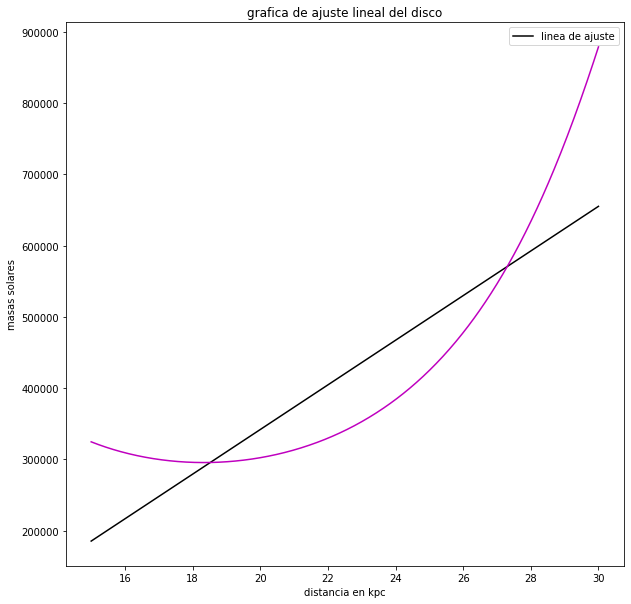

In [ ]:
R0 = np.linspace(15, 30, 620 )      #radio = [Kpc]
z0= np.linspace(1.0, 0.25, 620 )


plt.figure(figsize=(10,10))

#Coeficiente del ajuste 
a, b= np.polyfit(R0,dens_disk(R0,z0),1)

#Coeficiente de correlación (r)
r=np.corrcoef(R0,dens_disk(R0,z0))

plt.plot(R0,a*R0+b,'black', label= 'linea de ajuste')
plt.plot(R0,dens_disk(R0,z0),color='m')
plt.title('grafica de ajuste lineal del disco')
plt.xlabel('distancia en kpc')
plt.ylabel('masas solares')
#plt.xlim(0,20)
#plt.text(18.5,0.35, 'r={0:2.5f}'.format(r[0,1]))
#plt.text(22,0.40, 'y={0:2.5f}x+{1:2.5f}'.format(a,b))
plt.legend(loc="best")
plt.show()